Let's do some Alchemy!!!

We will build everything up from just the wave functions & chemical properties of the elements!

But before we do that, let's install a few libraries that we need to perform our tasks! 

* In a Jupyter Notebook, we can execute commands by placing ! (an exclamation mark) before the commands. 

In [ ]:
!pip install tpot

     |████████████████████████████████| 81kB 2.5MB/s 
     |████████████████████████████████| 163kB 8.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=eee4cf7857d55b3c203da105032c88b83fd779218e5ae18201e2005cb460b608
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


# What's Machine Learning?

Now, we have all the required tools at our disposal. 

We therefore, ask what's Machine Learning (ML)?

* Refer to slides for introduction on ML.

Machine Learning has 'learning' in it. So, one must ask - what are we learning? Or where do we learn from?

* This leads us to the next step! We need to get the data!

# How to get Data?

There are lots of databases that exist out there. A few of them are experimental and others are based on theoretical calculations like DFT or MD or MCMC. A few of these are:
- Your own experimental data
- Materials Project
- OQMD
- AFLOW
- quantum-machine.org
- NREL database
- 2D materials encylopedia
- Drugbank (COVID19 drug search)!

# How do Machines Learn?

So, one must now ask what are the different ways by which we can make Machine Learn?

* There are quite a lot of Supervised Machine Learning algorithms that exist
* All of them, can however, be classified as either based on Deep Learning or not based on Deep Learning
* Deep Learning is a subset of Machine Learning algorithms taking the inspiration from information processing in biological systems
* However, such deep learning based methods require huge amount of datasets and hence, becomes impractical if we have smaller datasets or small amount of data
* Non deep-learning methods do not suffer from this curse! And when used properly are capable of handling complex problems as well. 



# Data Naming conventions

Before we go ahead and make machines learn, we need to set some conventions that we will follow to represent our data. 

Let's say we have N pairs of datapoints: $(X_i,y_i)$ where $0\leq i \leq N-1$. We can accumulate all the datapoints as a matrix $\textbf{X}$ and $\textbf{y}$ such that $\textbf{X}=[X_0,X_1,..,X_{n-1}]$ and $\textbf{y} = [y_0,y_1,...,y_{n-1}]$.

The pairs $(X_i,y_i)$ can be anything. They can represent:
* (crystal structure, bandgaps)
* (DNA sequence, selectivity)
* (Images, person's name)
* (Speech, emotion) and so on...

For our little ML class, we will focus on the materials dataset that we downloaded before!





# Training and testing dataset

* Once we make our machines learn on data, how can we be sure that they actually learnt anything?

* This is the classical problem of learning v/s memorizing

* Our ML models can simply remember everything we provide and not learn anything at all. 

* This will result in very high accuracy for our provided data but they won't perform very good on unseen datasets. 

* Thus, what we do is that we set a portion of our data for testing our ML models; we call it **Testing dataset**

* The strategy thus, is that given a dataset tuple $(X,y)$, we split them into two tuples: $(train\_X,train\_y)$ and $(test\_X,test\_y)$

### Let's change our working directory

### Mount your Google drive first using the intructions shown before in the slides!

* Now go to the directory where you have saved the files we sent you (specifically *CO_CO2_RR_exp_database.xlsx*)

In [ ]:
cd drive/My\ Drive/quantum_mechanics

/content/drive/My Drive/quantum_mechanics


## Handling Data (Intro to Pandas)

### Functionalities
* We suggest you to save your data in tabular forms as .csv or excel files
* Pandas is a great python library to handle data - both for loading and storing data
* In the following couple of sections of this notebook, we will show how to load, process and save data using Pandas!

### Loading data using Pandas
* Let's say your experimental data is present in a tabular form (See the file - CO_CO2_RR_exp_database.xlsx)

* Pandas allows to read files with just one line!
       df = pd.read_excel('CO_CO2_RR_exp_database.xlsx') 

* Pandas allows you to read csv files as well!
       df = pd.read_csv('filename.csv') 

* This loads the excel file as a Pandas object which is called Pandas DataFrame!

![picture](https://drive.google.com/uc?id=1W7F7MIqFRb3KfxTk5Q03tSVE3u51XTAR)

# show the excel file!

In [ ]:
# Import the Pandas library
import pandas as pd

# Read your excel file
df = pd.read_excel('CO_CO2_RR_exp_database.xlsx')

# In case you have a csv file, you can use:
# df = pd.read_csv('filename.csv')

print(df)

        Creator  ...      Total
0      Member 1  ...  14.691853
1      Member 1  ...  18.293114
2      Member 1  ...  19.885077
3      Member 1  ...   5.857601
4      Member 1  ...  22.897618
...         ...  ...        ...
3710   Member 9  ...  68.854736
3711  Member 10  ...  93.800000
3712  Member 10  ...  86.500000
3713  Member 10  ...  80.400000
3714  Member 10  ...  84.000000

[3715 rows x 60 columns]


* A dataframe object has rows and columns indexed by what we call 'index' and 'columns'

* In the above dataframe, there are 3715 indices and 60 columns. Columns represent different features. Entries in the first column of a csv file or excel file are treated as names of the columns by the read function of Pandas.

* Indices are inferred from row numbers of excel file or csv file.

* Let's dig a bit into how values are being managed in the csv file.

### Processing data using Pandas

* You can view specific columns of Pandas dataframe. Let's say we want to view the columns - Total Gas and n-PrOH 
      print(df[['Total Gas','n-PrOH']])

![picture](https://drive.google.com/uc?id=12uIOyGZRJ0PO64qZgjdwTbFRoxJ8Bu7G)

* You can add as many columns name as you want in the list. Here we simply chose 'Total Gas' and 'n-PrOH'

* Now, you are seeing NaN in some of the entries. 'NaN' is python's way of telling you that, that value was not present in that cell of the excel sheet.

* This means that for the first entry in the experimental results present in the excel file, experimentalist did not record the normality of PrOH. 

* There are two most common ways we can handle such cases:
          1. Replace all such NaN values using zeros using: 
             df = df.fillna(0)
             print(df)
          2. Replacing all the NaNs with the average value of that property:
             df = df.fillna(df.mean())
             print(df)





In [ ]:
# Showing one of the approaches shown above
# df = df.fillna(0)

# Print contents before we process NaNs
print(df[['Total Gas','n-PrOH']])

# Process the NaNs; replacing them with mean values
df = df.fillna(df.mean())

# Print the newly processed dataframe
print(df[['Total Gas','n-PrOH']])

      Total Gas     n-PrOH
0     14.691853        NaN
1     18.293114        NaN
2     19.885077        NaN
3      5.857601        NaN
4     22.897618        NaN
...         ...        ...
3710  45.115029  11.223501
3711  64.100000   7.900000
3712  52.900000   5.700000
3713  47.600000  10.900000
3714  44.200000  24.000000

[3715 rows x 2 columns]
      Total Gas     n-PrOH
0     14.691853   2.242256
1     18.293114   2.242256
2     19.885077   2.242256
3      5.857601   2.242256
4     22.897618   2.242256
...         ...        ...
3710  45.115029  11.223501
3711  64.100000   7.900000
3712  52.900000   5.700000
3713  47.600000  10.900000
3714  44.200000  24.000000

[3715 rows x 2 columns]


* Also, the dataframe has a column which lists Date of the experiment.

* It does not make sense to see how time of the experiment influences the experiment being conducted because we don't expect Laws of Physics to be time variant!

* So, we will drop that column. We can drop columns in dataframes as,
        df = df.drop(columns=['DATE'])

In [ ]:
# Dropping irrelevant columns in Pandas dataframe

# df.columns.values lists names of all the columns of the dataframe
# Then we check if the string DATE is present in there or not.
# This returns True if it is present; else returns false
print('Is DATE column present in our dataframe? Ans: ','DATE' in df.columns.values)

# Let's drop the column
df = df.drop(columns=['DATE'])

# Let's check if our command worked!
print('Is DATE column present in our dataframe? Ans: ','DATE' in df.columns.values)

Is DATE column present in our dataframe? Ans:  True
Is DATE column present in our dataframe? Ans:  False


* Now, let's look at the column 'Catalyst'

![picture](https://drive.google.com/uc?id=1Srm8m2I0f1yx7jaIeZvbuHOyQZlQp-D4)

* Since Machine Learning requires all the inputs to be numerical, we want to convert it to numerical values. Some variables however aren't numerical in our present case. For example, type of catalyst in the column 'Catalyst' is not numerical. Such variables are called **Categorical Variables**!

* So, we perform encoding of such categoical  something called One Hot Encoding. Pandas has a beautiful function which takes care of it for us!

* Pandas allows us to use it as, 
        df = pd.get_dummies(df) 

* This encodes your dataframe so that now it is now perfect for Machine Learning!

In [ ]:
# One-Hot encode your dataframe for categorical variables / features
df = pd.get_dummies(df) 
print(df)

      Nb  Cr  Mo  ...  Electrolyte 2_K HCO3  Electrolyte 2_K OH  Electrolyte 2_Nan
0      0   0   0  ...                     0                   0                  1
1      0   0   0  ...                     0                   0                  1
2      0   0   0  ...                     0                   0                  1
3      0   0   0  ...                     0                   0                  1
4      0   0   0  ...                     0                   0                  1
...   ..  ..  ..  ...                   ...                 ...                ...
3710   0   0   0  ...                     0                   0                  1
3711   0   0   0  ...                     0                   0                  1
3712   0   0   0  ...                     0                   0                  1
3713   0   0   0  ...                     0                   0                  1
3714   0   0   0  ...                     0                   0                  1

[37

### Extracting data based on conditions

* What if you want to extract data from your dataframe based on some conditions?

* Let's look at an example! 

* Find all the records / rows where the values corresponding to *Current Density mA/cm2* column are greater than, say 10

In [ ]:
# select_idx_indicator is a boolean array
select_idx_indicator = df['Current Density mA/cm2'] > 10.0

# df.index is an array composed of index values
select_idx = df.index[select_idx_indicator]

# loc method allows one to select values based on rows and indices
print(df.loc[select_idx])
print(df.loc[select_idx,'Current Density mA/cm2'])

### Saving the data

* You can save the data to csv or excel format using Pandas 

* The way to do is shown below:
        df.to_csv('filename.csv')
        df.to_excel('filename.csv')

In [ ]:
# Let's save our processed dataframe to a csv

# You can replace the string `filename` with the name of your choice!
df.to_csv('filename.csv')
# This saves the file in the directory you are at

# This completes the basic tutorial on Pandas!

## Generating Training and Testing datasets

* We have the processed dataset. Let's generate training and testing datasets out of it

* We can use sklearn's train_test_split function to generate the training and testing dataset!
      # Let's get input and target values first
      X = df.drop(columns=['target'])
      y = df['target']

      # Let's split the datasets into training and testing!
      train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.1, random_state=42)

* *test_size* parameter determines what fraction of the total dataset to be set aside for generating test dataset

* *random_state* parameter determines how to split to it. It is the seed to the random number generator that lies in the background of the *train_test_split* function



In [ ]:
# Let's get input and target values first
X = df.drop(columns=['Total Gas'])
y = df['Total Gas']
 
from sklearn.model_selection import train_test_split

# Let's split the datasets into training and testing!
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

# Different Machine Learning Algorithms 

* We will use [scikit-learn](https://scikit-learn.org/stable/) (more commonly called sklearn) library's implementation of various algorithms for starters!

A few algorithms that we will focus on as part of this course:

* Linear Regression (Regression)
* Support Vector Machines (Classification)
* Naive Bayes (Classification)
* Deision Trees (Classification)
* Random Forests (Classification / Regression)
* K-means clustering (Unsupervised Learning)

# Linear Regression

One of the most common Machine Learning algorithm that everyone has most likely used somewhere in their past is... drum rolls....

**Linear Regression**!

A Linear Regression assumes a linear relationship between the inputs (X) and the outputs (y). 


$y = Ax+b$ 

![picture](https://drive.google.com/uc?id=1AIjWCvgGkYVXQMX1A5-Ifno_iqYw61E2)


One can implement linear regression as simple as shown below:


In [ ]:
# Recall: Our inputs are pairs (X,y)
# They are assigned variable names - (X_train,y_train), (X_test,y_test)

# Now, we will use Linear Regression on it

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Now let's do some learning!
lr.fit(X_train,y_train)

# Let's see how it performs on unknown dataset
print('Train R2: ', lr.score(X_train,y_train))
print('Test R2: ', lr.score(X_test,y_test))

Train R2:  0.9959049955958211
Test R2:  -15122714.895665247


# Support Vector Machines (SVM)

Support vector machines are very similar to linear regressions. But instead of regression, it is used for classification purposes. 

Given an input vector x, it calculates the output class as,

$y = sign(wx-b)$ 

where $sign(\cdot)$ is $\pm 1$ depending on whether the value of the expression is greater than or less than 0

![picture](https://drive.google.com/uc?id=1EtB1QPAD07DEP8NPekEIvxrnOtPkOZNm)

In [ ]:
# Recall: Our inputs are pairs (X,y)
# They are assigned variable names - (X_train,y_train), (X_test,y_test)

# Now, we will use SVM on it
# SVC stands for Support Vector Classification

from sklearn.svm import SVC
svc = SVC()

# Now let's do some learning!
svc.fit(X_train,y_train)

# Let's see how it performs on unknown dataset
print('Train Accuracy: ', svc.score(X_train,y_train))
print('Test Accuracy: ', svc.score(X_test,y_test))

# Naive Bayes

Naive Bayes is based on Bayes' theorem in Probability. Here is a quick recap expression of Bayes' theorem:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Naive Bayes' classifier assumes that all the features of input vector $X$ are conditionally independent of each other given the label class.

It predicts class as,

$$\hat{y} = argmax_{k\in\{1,...,K\}} p(C_k) \prod_{i=1}^{n} p(x_i|C_k)$$

where $p(\cdot)$ denote corresponding probabilities.

In [ ]:
# Recall: Our inputs are pairs (X,y)
# They are assigned variable names - (X_train,y_train), (X_test,y_test)

# Now, we will use Naive Bayes' classifier on it

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Now let's do some learning!
gnb.fit(X_train,y_train)

# Let's see how it performs on unknown dataset
print('Train Accuracy: ', gnb.score(X_train,y_train))
print('Test Accuracy: ', gnb.score(X_test,y_test))

# Decision Trees

Decision tress perform classification task based on repeated criterions over several input features. An example is shown below:

![picture](https://drive.google.com/uc?id=11VyMA8YliL050se_mBX7bfJ1splzgLTd)



In [ ]:
# Recall: Our inputs are pairs (X,y)
# They are assigned variable names - (X_train,y_train), (X_test,y_test)

# Now, we will use Decision Trees classifier on it

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Now let's do some learning!
dtc.fit(X_train,y_train)

# Let's see how it performs on unknown dataset
print('Train Accuracy: ', dtc.score(X_train,y_train))
print('Test Accuracy: ', dtc.score(X_test,y_test))

# Random Forests

Decision trees often lead to overfitting i.e. they perform very good on Training datasets but perform very poorly on Testing dataset. 

Thus, statisticians invented Random forests regressors and classifiers.

Random forests regressors and classifiers combine large number of decision trees which have been trained over different subsets of the training datasets.

![picture](https://drive.google.com/uc?id=1DmYQ4XVGoevDzo72iO4S9mmtWAAqD_mt)

In [ ]:
# Recall: Our inputs are pairs (X,y)
# They are assigned variable names - (X_train,y_train), (X_test,y_test)

# Now, we will use random forest regression on it

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# Now let's do some learning!
rfr.fit(X_train,y_train)

# Let's see how it performs on unknown dataset
print('Train R2: ', rfr.score(X_train,y_train))
print('Test R2: ', rfr.score(X_test,y_test))

Train R2:  0.999123159792752
Test R2:  0.9977396583348612


### Let's talk about deriving insights from Random Forests!

* Using Random Forest Regressor, we can get feature importances i.e. how much does a property influences the target variable!

* Let's see it in action!

* Once a Random Forest has been trained you can access input feature importances with:
          print(rfr.feature_importances_())

# K-means clustering

K-means clustering is one of the very important unsupervised learning methods besides Gaussian Mixtures (which we won't be learning in this course)

Probably most intriguing but quite likely not so useful in general. 

![picture](https://drive.google.com/uc?id=1CKuXc9YxAno4cgRTle7nkGvsoNH0bFVK)

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space. Training happens by minimizing the expression:

$$\sum_{i=0}^{n} min_{\mu_j \in C}(||x_i-\mu_j||^2)$$

# Can you make it simple?

* At this point, a genuine question will be how do we know which ML algorithm will work the best for me. 

* The list that we discussed before for all the ML platforms is just tip of the iceberg of all the possible supervised ML techniques that exist

* [TPOT](https://epistasislab.github.io/tpot/) is one the Python libraries that does that for you!

* **TPOT** uses Genetic Algorithm to find out the best machine learning pipeline for you!

* You may ask - then why does the previous library SKLearn still exist? Well, because TPOT is built upon it and it is quite likely that TPOT will build complex models. Complex models are always difficult to interpret! 

# How to use TPOT?

In [ ]:
# This code snippet explains how to use TPOT for regression 
# Example borrowed from https://epistasislab.github.io/tpot/examples/#boston-housing-prices-modeling

# This imports TPOT regressor object
from tpot import TPOTRegressor

# Loading Boston Housing price dataset from Sklearn
from sklearn.datasets import load_boston

# Importing library to perform testing and training data split
from sklearn.model_selection import train_test_split

# Load the dataset
housing = load_boston()

# Perform the split between training and testing
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target,
                                                    train_size=0.75, test_size=0.25, random_state=42)

# Let's load the TPOT regression object
# TPOT is based on Genetic algorithm(GA) for finding the best ML model for you!
# Just like evolution, GA has generations and population size parameters
# Generations indicate how much time do we wanna give to the TPOT searching algorithm
# Population size indicates how many of the variants of previous generation survive after every generation
# We eliminate those pipelines which perform badly from each generation
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

# Fitting the TPOT regression model
tpot.fit(X_train, y_train)

# Let's check its R2 score on testing dataset
print(tpot.score(X_test, y_test))

# We can also use tpot object to make predictions
y_pred = tpot.predict(X_test)



Generation 1 - Current best internal CV score: -12.183902552870293
Generation 2 - Current best internal CV score: -12.12046613884387
Generation 3 - Current best internal CV score: -12.12046613884387
Generation 4 - Current best internal CV score: -11.667642174558235
Generation 5 - Current best internal CV score: -11.644597394090933

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=6, min_child_weight=11, n_estimators=100, nthread=1, objective=reg:squarederror, subsample=0.7000000000000001)
-11.239793783197994


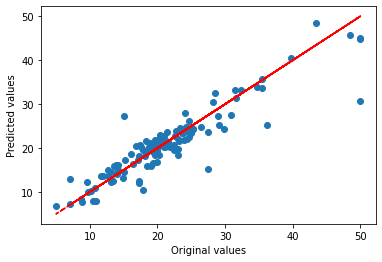

In [ ]:
import matplotlib.pyplot as plt
# Now, let's plot predicted values of y against original values
plt.plot(y_test,y_test,'r--')
plt.scatter(y_test,y_pred)
plt.xlabel('Original values')
plt.ylabel('Predicted values')
plt.show()

# You can also save the model and use it later!
tpot.export('tpot_boston_pipeline.py')